In [1]:
## Initialization
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from warmUpExercise import warmUpExercise
from plotData import plotData
from computeCost import computeCost
from gradientDescent import gradientDescent


## ==================== Part 1: Basic Function ====================
# Complete warmUpExercise.m
print('Running warmUpExercise ... ')
print('5x5 Identity Matrix: ')

print(warmUpExercise())

print('Program paused. Press enter to continue.')




Running warmUpExercise ... 
5x5 Identity Matrix: 
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
Program paused. Press enter to continue.


Plotting Data ...


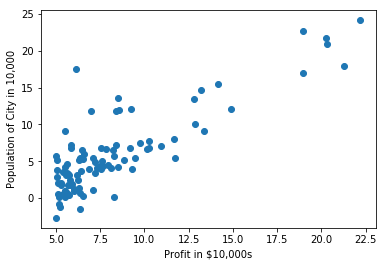

Program paused. Press enter to continue.


In [2]:
## ======================= Part 2: Plotting =======================
print('Plotting Data ...')
data = np.genfromtxt('ex1data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]
m = len(y); # number of training examples

# 1D array to column vector
data_X = np.reshape(X, (m,1))
y = np.reshape(y, (m,1))

# Plot Data
# Note: You have to complete the code in plotData.m
plotData(data_X, y)

print('Program paused. Press enter to continue.')



Testing the cost function ...
With theta = [[0], [0]]
Cost computed =  32.0727338775
Expected cost value (approx) 32.07

With theta = [ [-1], [2] ]
Cost computed =  54.242455082
Expected cost value (approx) 54.24
Program paused. Press enter to continue.

Running Gradient Descent ...
Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
 -3.6303
  1.1664



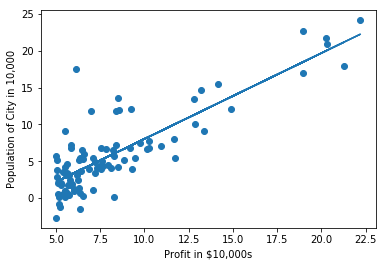

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129
Program paused. Press enter to continue.


In [3]:
## =================== Part 3: Cost and Gradient descent ===================

#X = [np.ones(m, 1), data(:,1)]; # Add a column of ones to x
X = np.concatenate((np.ones((m,1)), data_X), axis=1)
theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

print('\nTesting the cost function ...')
# compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [[0], [0]]\nCost computed = ', J)
print('Expected cost value (approx) 32.07')

# further testing of the cost function
J = computeCost(X, y, np.array([[-1],[2]]))
print('\nWith theta = [ [-1], [2] ]\nCost computed = ', J)
print('Expected cost value (approx) 54.24');

print('Program paused. Press enter to continue.');

print('\nRunning Gradient Descent ...')
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:');
print(theta);
print('Expected theta values (approx)');
print(' -3.6303\n  1.1664\n');

# Plot the linear fit
plotData(data_X, y, theta)

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.matmul(np.array([1, 3.5]), theta)[0]
print('For population = 35,000, we predict a profit of %f' % (predict1*10000) )
predict2 = np.matmul(np.array([1, 7]), theta)[0]
print('For population = 70,000, we predict a profit of %f' % (predict2*10000) )

print('Program paused. Press enter to continue.')


Visualizing J(theta_0, theta_1) ...


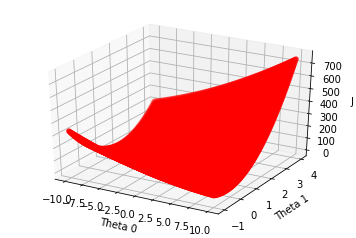

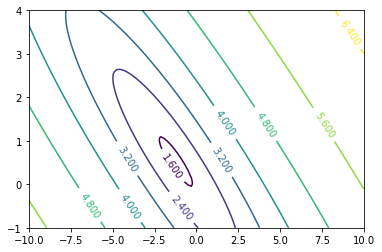

In [4]:
## ============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))


# Fill out J_vals
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data_x, data_y = [], []
for i, i_var in enumerate(theta0_vals):
    for j, j_var in enumerate(theta1_vals):
        t = np.array([[i_var],[j_var]])
        J_vals[i,j] = computeCost(X, y, t)
        data_x.append(i_var)
        data_y.append(j_var)

ax.scatter(data_x, data_y, J_vals.flatten(), c='r', marker='o')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('J')
plt.show()


# Contour plot
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

X, Y = np.meshgrid(theta0_vals, theta1_vals)

# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, np.log(J_vals))
plt.clabel(CS, inline=1, fontsize=10)
plt.show()
